In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho = 28

In [3]:
def rk4singlestep(fun, dt, t0, y0):
    """
        This function does a single 4th-order Runge-Kutta step for ODE integration,
        where fun is the ODE, dt is the timestep, t0 is the current time, and y0 is
        the current initial condition. 
    """
    f1 = fun(t0, y0)
    f2 = fun(t0 + dt / 2, y0 + (dt / 2) * f1)
    f3 = fun(t0 + dt / 2, y0 + (dt / 2) * f2)
    f4 = fun(t0 + dt, y0 + dt * f3)
    yout = y0 + (dt / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
    return yout

In [4]:
def lorenz(t, y):
    """
        This function defines the dynamical equations
        that represent the Lorenz system. 
        
        Normally we would need to pass the values of
        sigma, beta, and rho, but we have already defined them
        globally above.
    """
    # y is a three dimensional state-vector
    dy = [sigma * (y[1] - y[0]), 
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
    return np.array(dy)

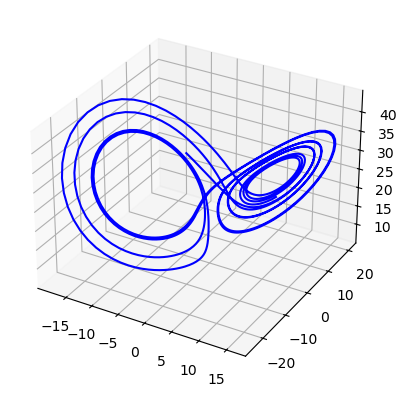

In [9]:
# Initial condition
y0 = [-8, 8, 27]

# Compute trajectory 
dt = 0.01
T = 10
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)

Y = np.zeros((3, num_time_pts))
Y[:, 0] = y0
yin = y0
for i in range(num_time_pts - 1):
    yout = rk4singlestep(lorenz, dt, t[i], yin)
    Y[:, i + 1] = yout
    yin = yout

ax = plt.figure().add_subplot(projection='3d')  # make a 3D plot
ax.plot(Y[0, :], Y[1, :], Y[2, :], 'b')
plt.show()

In [19]:
# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75
def voltera(t, y):
    """ Return the growth rate of fox and rabbit populations. """
    dy = np.array([ a*y[0] -   b*y[0]*y[1] ,
                  -c*y[1] + d*b*y[0]*y[1] ])
    return dy

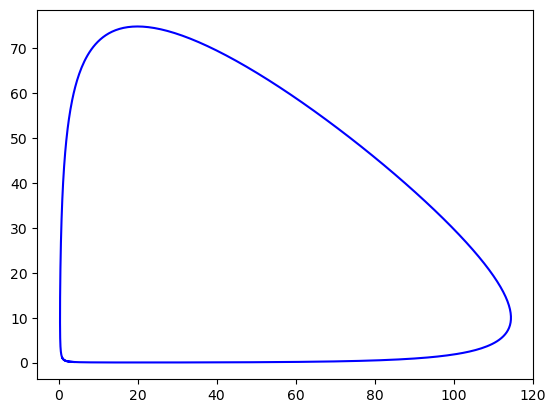

In [21]:
# Initial condition
y0 = [1, 1,]

# Compute trajectory 
dt = 0.01
T = 10
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)

Y = np.zeros((2, num_time_pts))
Y[:, 0] = y0
yin = y0
for i in range(num_time_pts - 1):
    yout = rk4singlestep(voltera, dt, t[i], yin)
    Y[:, i + 1] = yout
    yin = yout

ax = plt.figure().add_subplot()  
ax.plot(Y[0, :], Y[1, :], 'b')
plt.show()